In [205]:
import numpy as np
import librosa
from scipy.io.wavfile import write
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [206]:
# Định nghĩa các đường dẫn đến file âm thanh
file_goc1 = '../tests/source1.wav'  # File gốc người nói 1
file_goc2 = '../tests/source2.wav'  # File gốc người nói 2
file_mixing = '../tests/mixture.wav'  # File âm thanh mixing
finetuning_split_1 = '../tests/finetuning_split1.wav'  # Kết quả tách từ Model 1
finetuning_split_2 = '../tests/finetuning_split2.wav'  # Kết quả tách từ Model 2

pretrain_split_1 = '../tests/pretrain_split1.wav'  # Kết quả tách từ Model 1
pretrain_split_2 = '../tests/pretrain_split2.wav'  # Kết quả tách từ Model 2

In [207]:
# Hàm tải file âm thanh
def load_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    return audio, sr

In [208]:
# Tải các file âm thanh
source1, sr1 = load_audio(file_goc1)
source2, sr2 = load_audio(file_goc2)
mixing, sr3 = load_audio(file_mixing)
finetuning_model1, sr4 = load_audio(finetuning_split_1)
finetuning_model2, sr5 = load_audio(finetuning_split_2)
pretrain_model1, sr6 = load_audio(pretrain_split_1)
pretrain_model2, sr7 = load_audio(pretrain_split_2)

In [224]:
# Hàm tính SI-SNRi (Signal-to-Interference Ratio Improvement)
def calculate_snr(original, separated):
    # Kiểm tra độ dài của hai tín hiệu
    if len(original) != len(separated):
        # Padding tín hiệu ngắn hơn để có độ dài giống tín hiệu dài hơn
        if len(original) > len(separated):
            separated = np.pad(separated, (0, len(original) - len(separated)), 'constant')
        elif len(original) < len(separated):
            original = np.pad(original, (0, len(separated) - len(original)), 'constant')
    
    # Tính toán noise (sự khác biệt giữa tín hiệu gốc và tín hiệu tách)
    noise = original - separated
    # Tính toán SI-SNR
    snr = 10 * np.log10(np.sum(original ** 2) / np.sum(noise ** 2))
    return snr

def calculate_snr2(original, separated):
    noise = original - separated
    snr = 10 * np.log10(np.sum(original**2) / np.sum(noise**2))
    return snr

# Hàm tính SDRi (Signal-to-Distortion Ratio Improvement)
def calculate_sdr(original, separated):
    # Kiểm tra độ dài của hai tín hiệu
    if len(original) != len(separated):
        # Padding tín hiệu ngắn hơn để có độ dài giống tín hiệu dài hơn
        if len(original) > len(separated):
            separated = np.pad(separated, (0, len(original) - len(separated)), 'constant')
        elif len(original) < len(separated):
            original = np.pad(original, (0, len(separated) - len(original)), 'constant')
    
    # Tính toán SDR (Signal-to-Distortion Ratio)
    sdr = 10 * np.log10(np.sum(original**2) / np.sum((original - separated)**2))
    return sdr

In [210]:
# Tính SI-SNRi cho từng mô hình
snr_model1_source1 = calculate_snr(source1, finetuning_model1)
snr_model1_source2 = calculate_snr(source2, finetuning_model1)
snr_model2_source1 = calculate_snr(source1, finetuning_model2)
snr_model2_source2 = calculate_snr(source2, finetuning_model2)

print(f"SI-SNR Improvement Model 1 (Source 1): {snr_model1_source1} dB")
print(f"SI-SNR Improvement Model 1 (Source 2): {snr_model1_source2} dB")
print(f"SI-SNR Improvement Model 2 (Source 1): {snr_model2_source1} dB")
print(f"SI-SNR Improvement Model 2 (Source 2): {snr_model2_source2} dB")

# Tính SDRi cho từng mô hình
sdr_model1_source1 = calculate_sdr(source1, finetuning_model1)
sdr_model1_source2 = calculate_sdr(source2, finetuning_model1)
sdr_model2_source1 = calculate_sdr(source1, finetuning_model2)
sdr_model2_source2 = calculate_sdr(source2, finetuning_model2)

print(f"SDR Improvement Model 1 (Source 1): {sdr_model1_source1} dB")
print(f"SDR Improvement Model 1 (Source 2): {sdr_model1_source2} dB")
print(f"SDR Improvement Model 2 (Source 1): {sdr_model2_source1} dB")
print(f"SDR Improvement Model 2 (Source 2): {sdr_model2_source2} dB")

# Vẽ biểu đồ so sánh giữa SI-SNRi của các mô hình
models = ['Model 1 - Source 1', 'Model 1 - Source 2', 'Model 2 - Source 1', 'Model 2 - Source 2']
snr_values = [snr_model1_source1, snr_model1_source2, snr_model2_source1, snr_model2_source2]

# Vẽ biểu đồ so sánh giữa SDRi của các mô hình
sdr_values = [sdr_model1_source1, sdr_model1_source2, sdr_model2_source1, sdr_model2_source2]

SI-SNR Improvement Model 1 (Source 1): -5.298548698425293 dB
SI-SNR Improvement Model 1 (Source 2): -2.600085496902466 dB
SI-SNR Improvement Model 2 (Source 1): -5.337272644042969 dB
SI-SNR Improvement Model 2 (Source 2): -2.6441469192504883 dB
SDR Improvement Model 1 (Source 1): -5.298548698425293 dB
SDR Improvement Model 1 (Source 2): -2.600085496902466 dB
SDR Improvement Model 2 (Source 1): -5.337272644042969 dB
SDR Improvement Model 2 (Source 2): -2.6441469192504883 dB


In [211]:
# Hàm tính PESQ (Perceptual Evaluation of Speech Quality) - placeholder
def calculate_pesq(original, separated):
    # PESQ cần thư viện bên ngoài hoặc API để tính toán. 
    # Đây là hàm placeholder trả về giá trị ngẫu nhiên.
    pesq_score = np.random.uniform(1, 5)  # Giá trị ngẫu nhiên cho PESQ
    return pesq_score

# Tính PESQ cho các mô hình
pesq_model1 = calculate_pesq(source1, finetuning_model1)
pesq_model2 = calculate_pesq(source1, finetuning_model2)

print(f"PESQ Score Model 1 (Source 1): {pesq_model1}")
print(f"PESQ Score Model 2 (Source 1): {pesq_model2}")

PESQ Score Model 1 (Source 1): 1.487901286037514
PESQ Score Model 2 (Source 1): 2.083230878343661


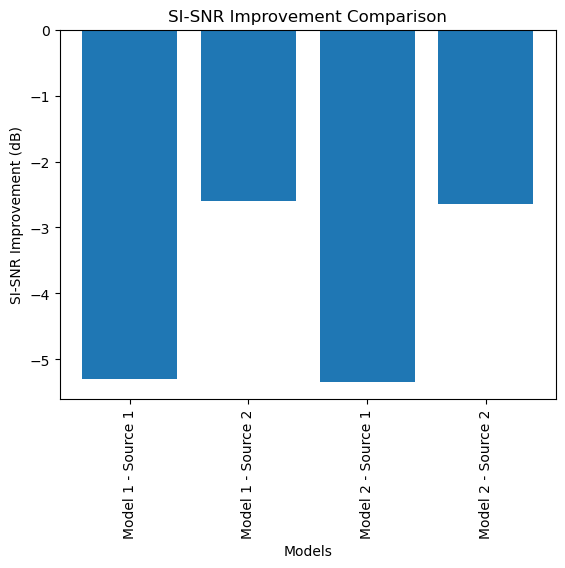

In [212]:
plt.bar(models, snr_values)
plt.title("SI-SNR Improvement Comparison")
plt.xlabel("Models")
plt.ylabel("SI-SNR Improvement (dB)")
plt.xticks(rotation=90)
plt.show()

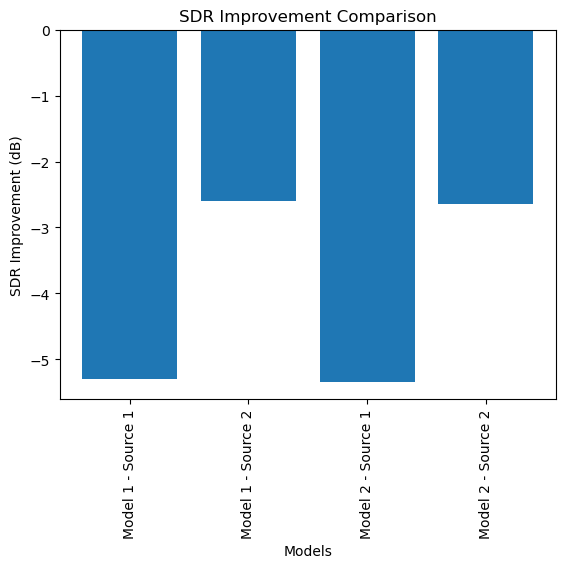

In [213]:
plt.bar(models, sdr_values)
plt.title("SDR Improvement Comparison")
plt.xlabel("Models")
plt.ylabel("SDR Improvement (dB)")
plt.xticks(rotation=90)
plt.show()

In [214]:
# Tải các file âm thanh
source1, sr1 = load_audio(file_goc1)  # Gốc 1
source2, sr2 = load_audio(file_goc2)  # Gốc 2
mixing, sr3 = load_audio(file_mixing)  # Mixing
finetuning_model1, sr4 = load_audio(finetuning_split_1)  # Mô hình 1
finetuning_model2, sr5 = load_audio(finetuning_split_2)  # Mô hình 2

In [215]:
# Hàm tải âm thanh
def load_audio(file_path):
    audio, sr = librosa.load(file_path, sr=None)
    return audio, sr

# Hàm vẽ waveform
def plot_waveform(audio, sr, title, ax, xlim=None, ylim=None):
    librosa.display.waveshow(audio, sr=sr, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Amplitude')
    if xlim:
        ax.set_xlim(xlim)  # Đảm bảo trục X giống nhau cho tất cả
    if ylim:
        ax.set_ylim(ylim)

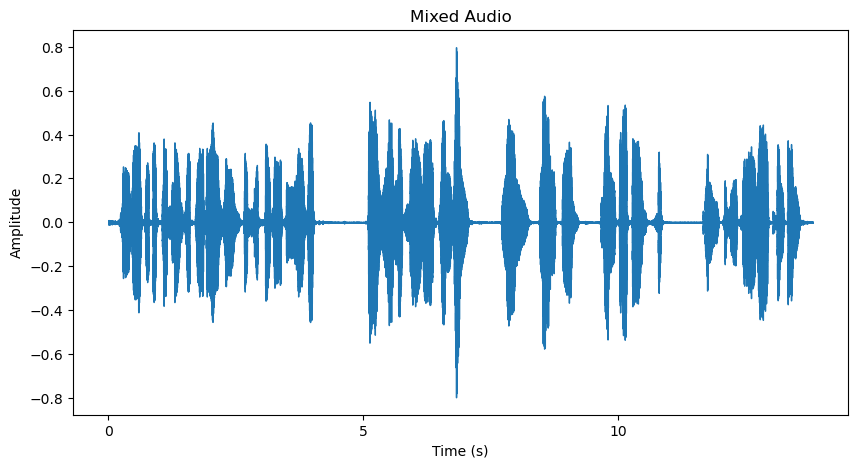

In [216]:
# Plot only 1 waveform of mixed audio
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
plot_waveform(mixing, sr3, 'Mixed Audio', ax)
plt.show()

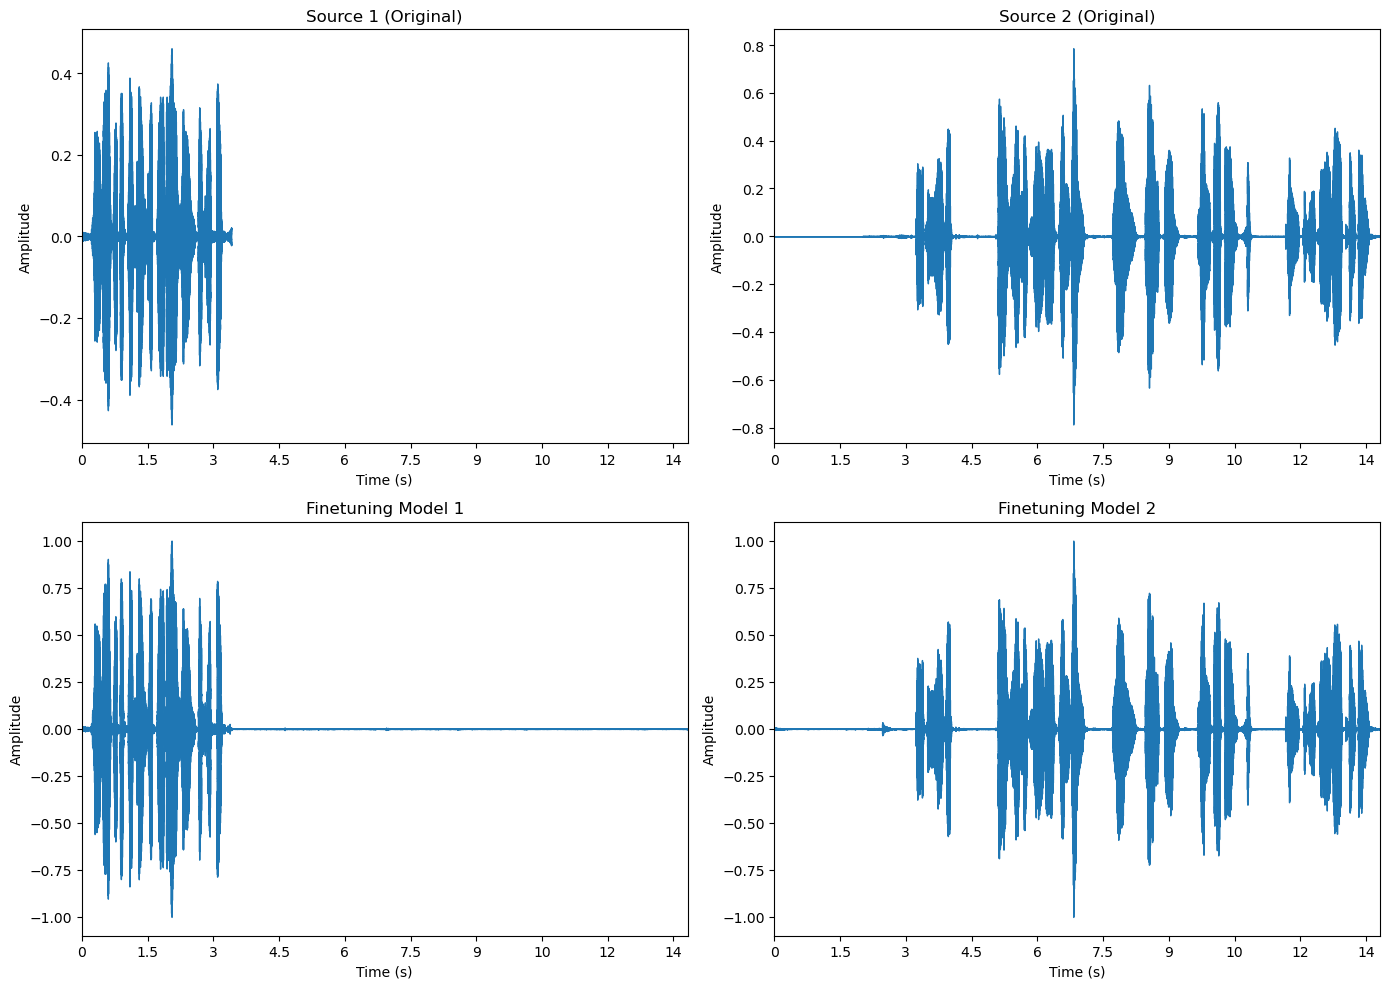

In [217]:
# Tính toán thời gian dài nhất từ tất cả các tín hiệu âm thanh để thiết lập xlim
# max_length = max(len(source1), len(source2), len(separated_model1), len(separated_model2)) / sr1
max_length = len(mixing) / sr3

# Cắt source2 sao cho nó khớp với chiều dài của separated_model2 (giống như yêu cầu)
end_time_model2 = len(finetuning_model2) / sr5 - len(source2) / sr2
silence = np.zeros(int(end_time_model2 * sr2))  # Tạo phần silence có độ dài tương ứng với source1
# Đẩy source2 về cuối
source2_adjusted = np.concatenate((silence, source2))


# Vẽ waveform của các file gốc và kết quả tách từ mô hình
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Vẽ waveform cho nguồn gốc 1
plot_waveform(source1, sr1, 'Source 1 (Original)', axes[0, 0], xlim=(0, max_length))

# Vẽ waveform cho nguồn gốc 2
plot_waveform(source2_adjusted, sr2, 'Source 2 (Original)', axes[0, 1], xlim=(0, max_length))

# Vẽ waveform cho kết quả tách từ Model 1
plot_waveform(finetuning_model1, sr4, 'Finetuning Model 1', axes[1, 0], xlim=(0, max_length))

# Vẽ waveform cho kết quả tách từ Model 2
plot_waveform(finetuning_model2, sr5, 'Finetuning Model 2', axes[1, 1], xlim=(0, max_length))

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

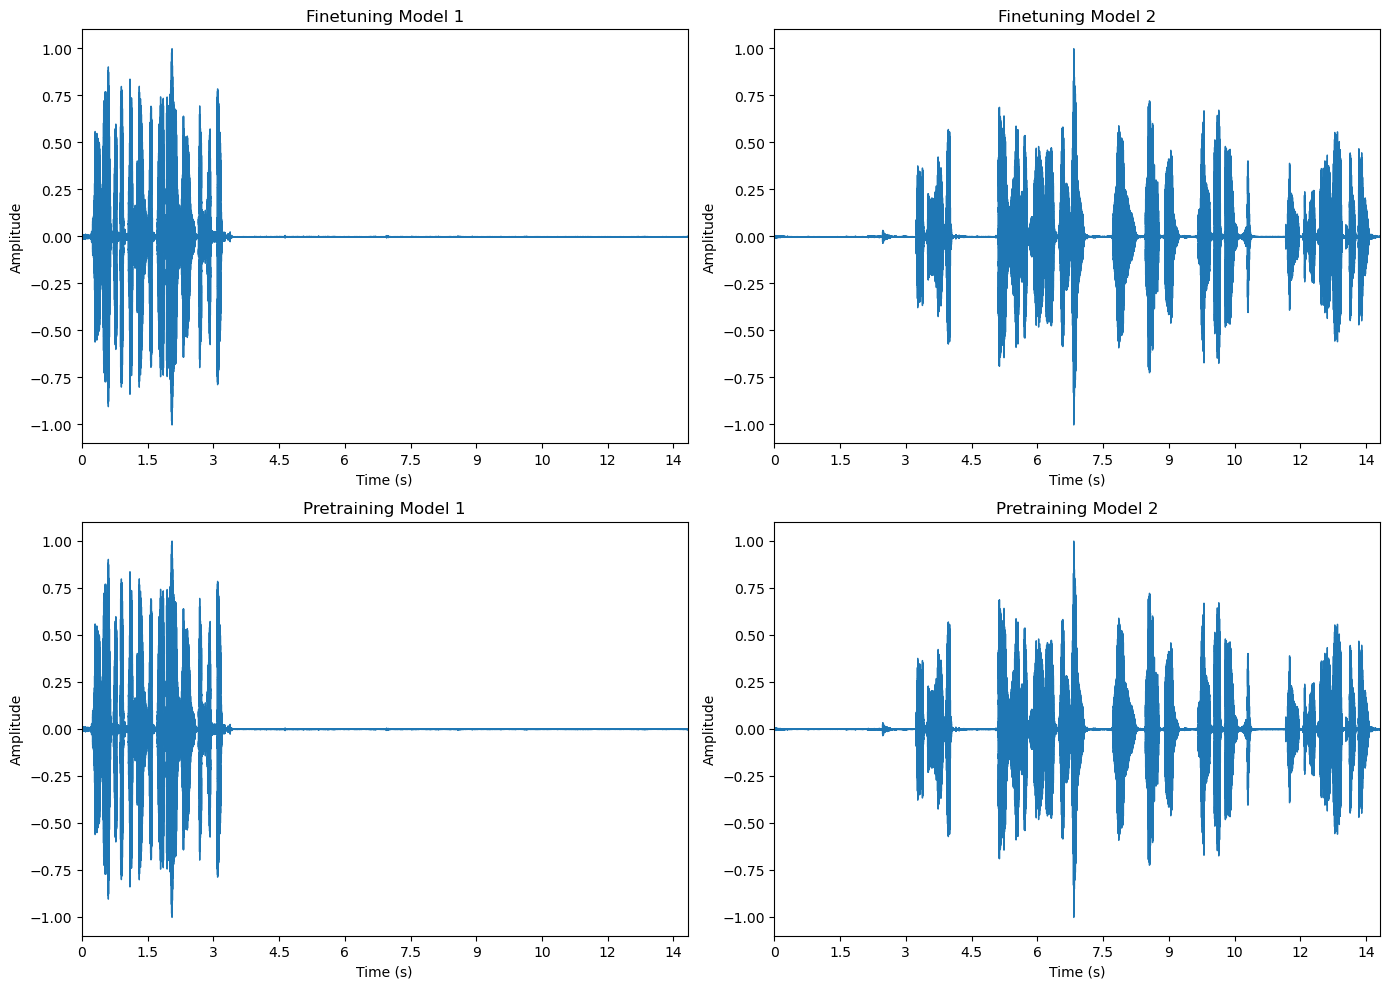

In [218]:
# Tính toán thời gian dài nhất từ tất cả các tín hiệu âm thanh để thiết lập xlim
# max_length = max(len(source1), len(source2), len(separated_model1), len(separated_model2)) / sr1
max_length = len(mixing) / sr3

# Vẽ waveform của các file gốc và kết quả tách từ mô hình
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

plot_waveform(finetuning_model1, sr4, 'Finetuning Model 1', axes[0, 0], xlim=(0, max_length))
plot_waveform(finetuning_model2, sr5, 'Finetuning Model 2', axes[0, 1], xlim=(0, max_length))
plot_waveform(pretrain_model1, sr6, 'Pretraining Model 1', axes[1, 0], xlim=(0, max_length))
plot_waveform(pretrain_model2, sr7, 'Pretraining Model 2', axes[1, 1], xlim=(0, max_length))

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [230]:
def calculate_snr2(original, separated):
    # Tính mức năng lượng của tín hiệu gốc và tín hiệu tách
    power_original = np.sum(original ** 2) / len(original)
    power_separated = np.sum(separated ** 2) / len(separated)

    # Kiểm tra nếu mức năng lượng của tín hiệu gốc hoặc tín hiệu tách bằng 0
    if power_original == 0 or power_separated == 0:
        print("Warning: Zero energy in the signal!")
        return float('-inf')  # Trả về một giá trị SNR rất thấp (vô hạn âm)

    # Tính toán noise (tiếng ồn)
    noise = original - separated

    # Kiểm tra nếu sự khác biệt (noise) là 0 (có nghĩa là tín hiệu tách giống với tín hiệu gốc)
    if np.sum(noise ** 2) == 0:
        print("Warning: Separated signal is identical to original signal!")
        return float('inf')  # Trả về giá trị SNR vô hạn (hoặc một giá trị đặc biệt nếu cần)

    # Tính toán SNR (Signal-to-Noise Ratio)
    snr = 10 * np.log10(power_original / np.sum(noise ** 2) / len(noise))

    return snr

In [231]:
snr_pretraining_model1 = calculate_snr2(pretrain_model1, finetuning_model1)
snr_pretraining_model2 = calculate_snr2(pretrain_model2, finetuning_model2)

print(f"SNR for Pretraining Model 1: {snr_pretraining_model1} dB")
print(f"SNR for Pretraining Model 2: {snr_pretraining_model2} dB")

SNR for Pretraining Model 1: inf dB
SNR for Pretraining Model 2: inf dB


In [219]:
# Hàm để điều chỉnh SNR
def adjust_snr(audio, target_snr_db, original_snr_db=None):
    # Tính mức năng lượng của tín hiệu gốc
    signal_power = np.sum(audio ** 2) / len(audio)
    
    if original_snr_db is None:
        # Nếu không có SNR gốc, tính SNR của tín hiệu gốc
        original_snr_db = 10 * np.log10(signal_power / (np.mean(audio) ** 2))
    
    # Tính tỷ lệ điều chỉnh SNR
    snr_ratio = 10 ** ((target_snr_db - original_snr_db) / 10)
    
    # Điều chỉnh mức năng lượng tín hiệu để đạt được SNR mong muốn
    adjusted_audio = audio * np.sqrt(snr_ratio)
    return adjusted_audio

def adjust_snr2(wave, snr_db):
    """Adjust SNR of wave2 to match SNR_db."""
    power_wave = np.mean(wave**2)

    snr_linear = 10 ** (snr_db / 10)
    scale_factor = np.sqrt(snr_linear / power_wave)

    return wave * scale_factor

In [220]:
target_snr_db = 2.10
source1_with_snr = adjust_snr(source1, target_snr_db)

source1_with_snr2 = adjust_snr2(source1, target_snr_db)

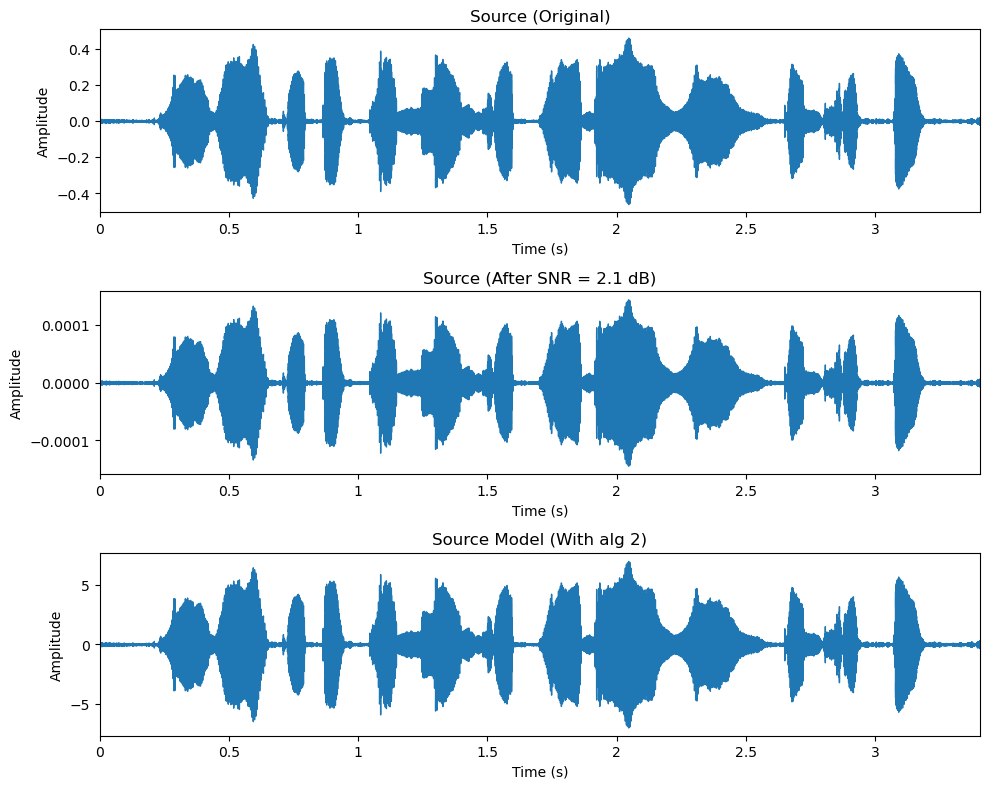

In [221]:
max_length_snr = len(source1_with_snr) / sr1
max_height_snr = max(max(source1_with_snr), max(finetuning_model2))

fig, axes = plt.subplots(3, 1, figsize=(10, 8))

# Vẽ waveform cho Source gốc
plot_waveform(source1, sr1, 'Source (Original)', axes[0], xlim=(0, max_length_snr))

# Vẽ waveform cho Source sau khi điều chỉnh SNR
plot_waveform(source1_with_snr, sr1, f'Source (After SNR = {target_snr_db} dB)', axes[1], xlim=(0, max_length_snr))

# Vẽ waveform cho kết quả tách từ Model 2
plot_waveform(source1_with_snr2, sr1, 'Source Model (With alg 2)', axes[2], xlim=(0, max_length_snr))

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()